In [21]:
import seaborn
from matplotlib import pyplot

import swasputils

In [2]:
classifications = swasputils.ZooniverseClassifications().get_workflow(7534)

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\anm83\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
classification_counts = classifications.count_annotations()

In [4]:
classification_fracs = classification_counts.apply(lambda x: x/x.sum(), axis=1)

In [5]:
classification_fracs.head()

annotation_T0,EA/EB type,EW type,Junk,Pulsator,Rotator,Unknown
subject_ids,,,,,,
21803099,0.0,0.0,1.0,0.0,0.0,0.0
21803103,1.0,0.0,0.0,0.0,0.0,0.0
21803109,0.0,0.0,1.0,0.0,0.0,0.0
21803115,1.0,0.0,0.0,0.0,0.0,0.0
21803118,0.0,0.0,1.0,0.0,0.0,0.0


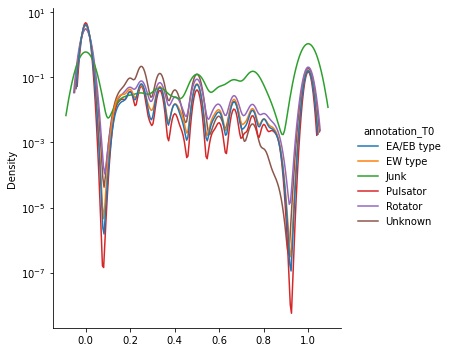

In [6]:
seaborn.displot(data=classification_fracs, log_scale=(False, True), kind='kde')

In [7]:
EXPERT_USERS = ('AJNORTON', 'HeidiThiemann')
expert_classifications = classifications.get_users(EXPERT_USERS)
expert_classifications.df.drop_duplicates('subject_ids', inplace=True)
expert_classifications.decode_annotations()
gold_standard_subjects = expert_classifications.df['subject_ids']

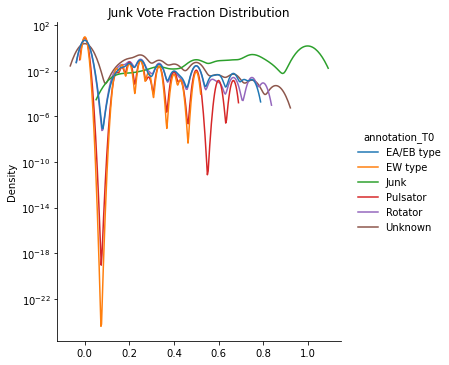

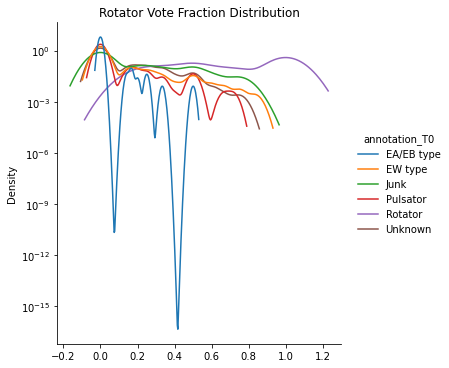

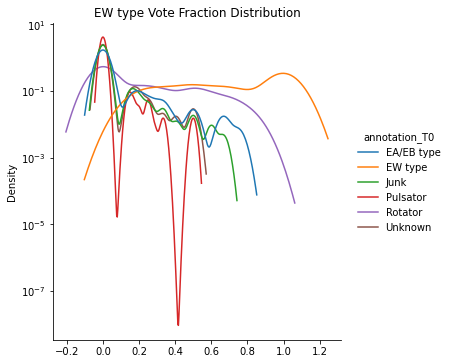

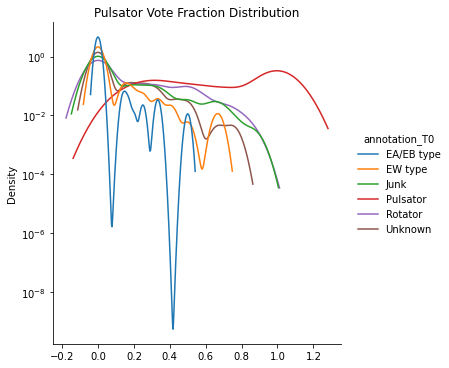

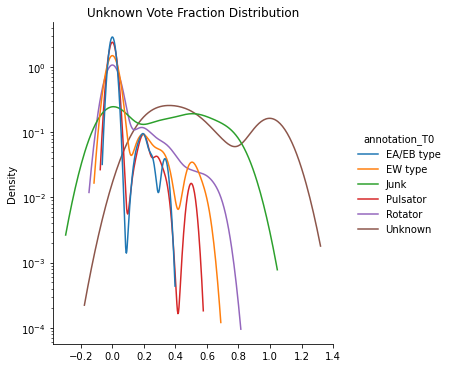

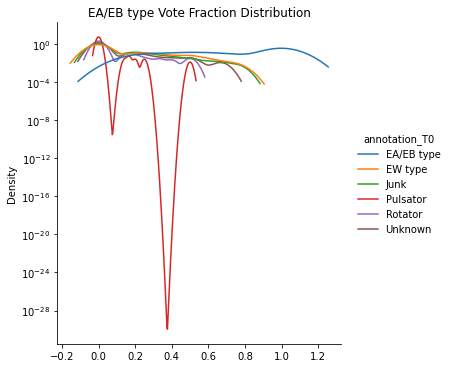

In [31]:
for subject_type in expert_classifications.df['annotation_T0'].unique():
    seaborn.displot(
        classification_fracs[classification_fracs.index.isin(
            expert_classifications.df[expert_classifications.df['annotation_T0'] == subject_type]['subject_ids']
        )],
        kind='kde',
        log_scale=(False, True),
    )
    pyplot.title('{} Vote Fraction Distribution'.format(subject_type))

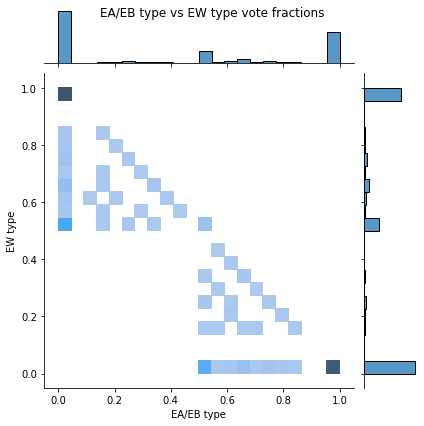

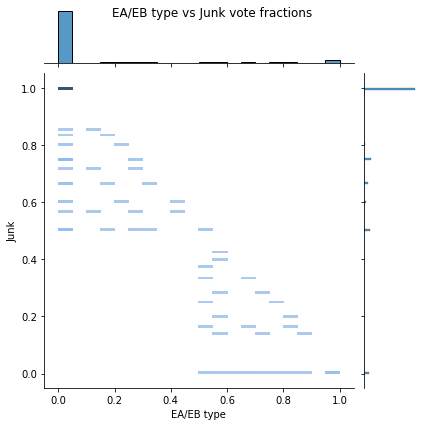

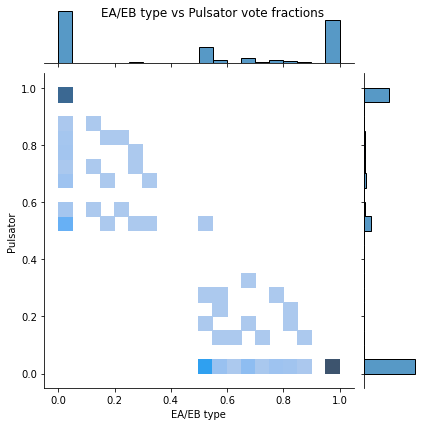

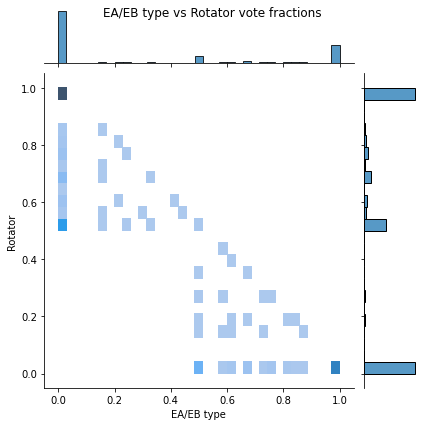

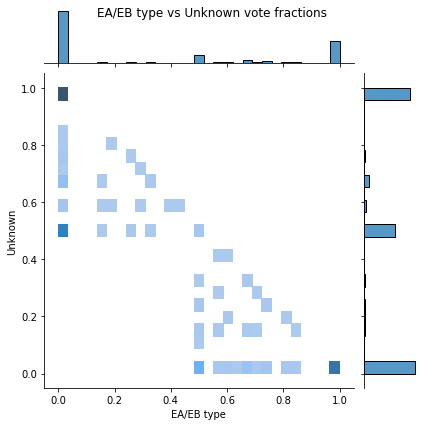

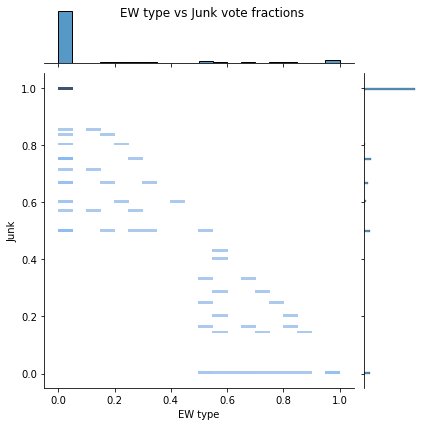

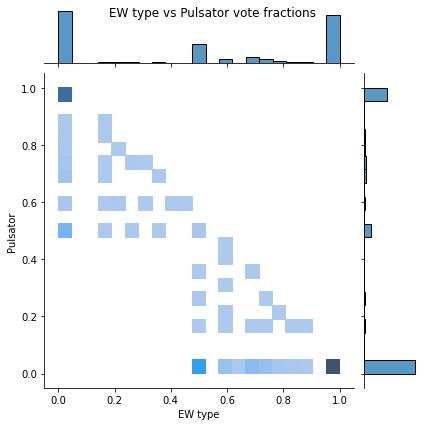

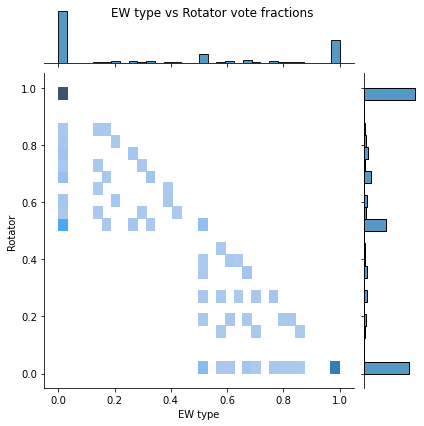

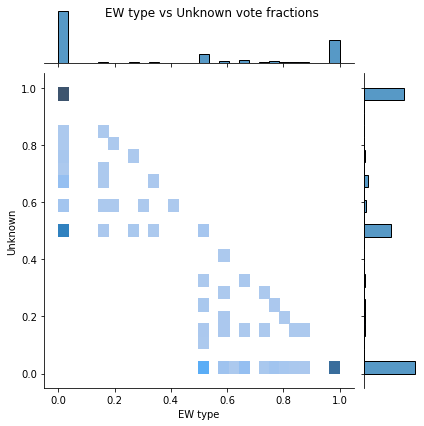

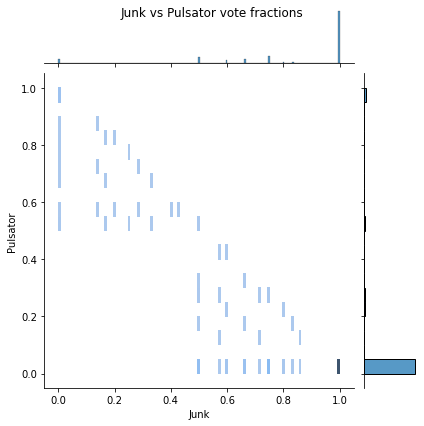

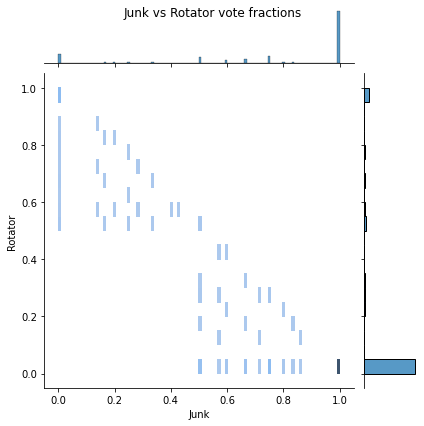

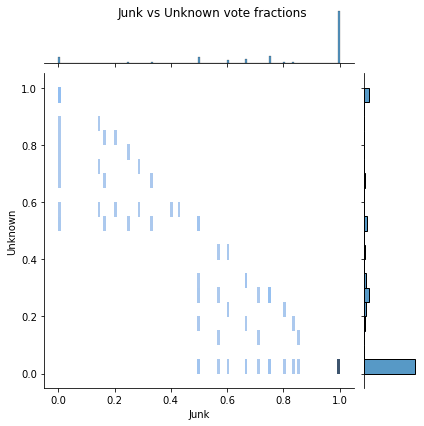

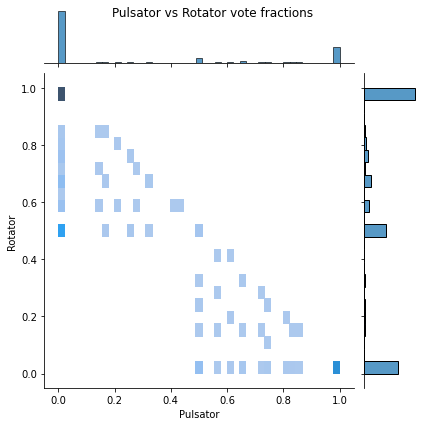

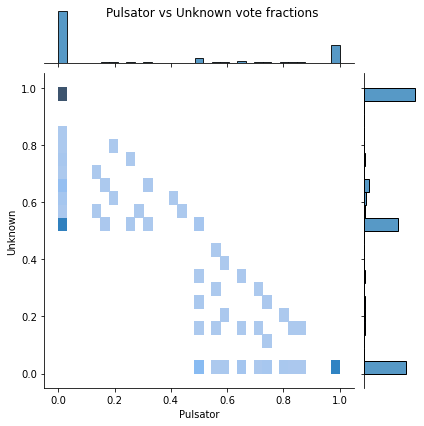

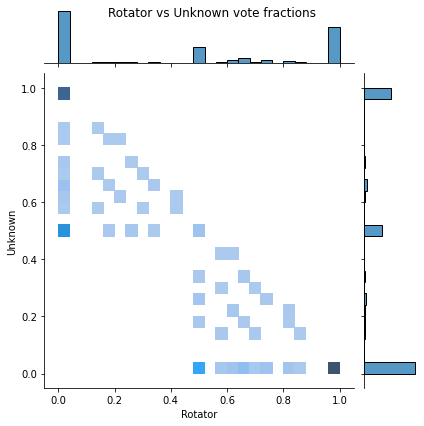

In [8]:
plotted_combos = set()
for x_type in classification_fracs.keys():
    for y_type in classification_fracs.keys():
        if x_type == y_type or (y_type, x_type) in plotted_combos:
            continue

        p = seaborn.jointplot(
            data=classification_fracs[(classification_fracs[x_type] >= 0.5) | (classification_fracs[y_type] >= 0.5)],
            x=x_type,
            y=y_type,
            kind='hist',
        )
        p.fig.suptitle('{} vs {} vote fractions'.format(x_type, y_type))
        plotted_combos.add((x_type, y_type))